In [23]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [32]:
path = "/content/drive/MyDrive/animal"
generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    rotation_range=10,
)
train_data = generator.flow_from_directory(
    path,
    subset="training",
    target_size=(224, 224),
    shuffle=True,
)
validation_data = generator.flow_from_directory(
    path,
    shuffle=False,
    subset="validation",
    target_size=(224, 224)
)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [33]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(600, activation='relu'),
    layers.Dense(250, activation='relu'),
    layers.Dense(5, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)


plt_model = model.fit(train_data, epochs=20)





Epoch 1/20
33/33 [==============================] - 30s 778ms/step - loss: 45.7538 - accuracy: 0.2131
Epoch 2/20
33/33 [==============================] - 26s 803ms/step - loss: 1.8106 - accuracy: 0.2217
Epoch 3/20
33/33 [==============================] - 26s 787ms/step - loss: 1.6025 - accuracy: 0.2274
Epoch 4/20
33/33 [==============================] - 26s 788ms/step - loss: 1.6012 - accuracy: 0.2409
Epoch 5/20
33/33 [==============================] - 26s 801ms/step - loss: 1.6029 - accuracy: 0.2409
Epoch 6/20
33/33 [==============================] - 26s 792ms/step - loss: 1.6044 - accuracy: 0.2226
Epoch 7/20
33/33 [==============================] - 26s 796ms/step - loss: 1.6011 - accuracy: 0.2409
Epoch 8/20
33/33 [==============================] - 26s 783ms/step - loss: 1.6002 - accuracy: 0.2217
Epoch 9/20
33/33 [==============================] - 26s 790ms/step - loss: 1.6002 - accuracy: 0.2409
Epoch 10/20
33/33 [==============================] - 26s 779ms/step - loss: 1.5999 - accur

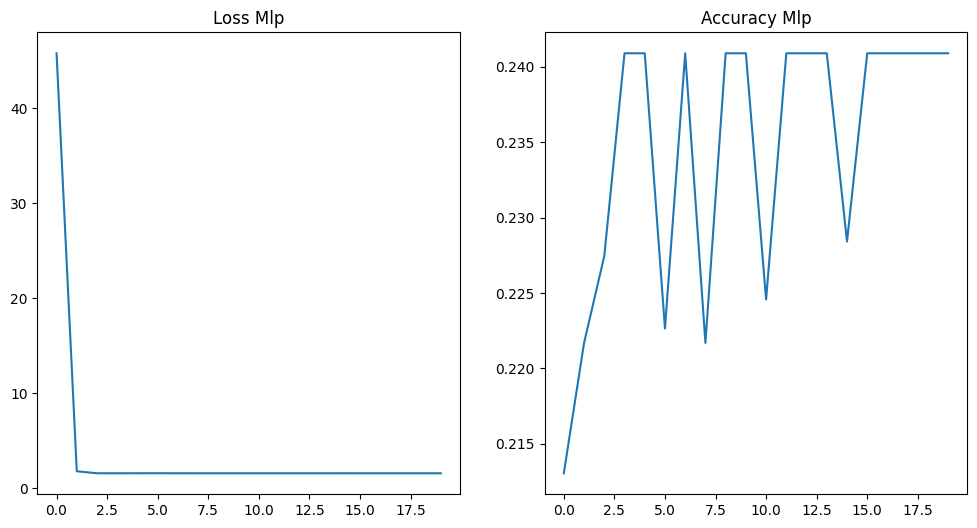

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(plt_model.history['loss'])
ax1.set_title("Loss Mlp")
ax2.plot(plt_model.history['accuracy'])
ax2.set_title("Accuracy Mlp")
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 6s 639ms/step


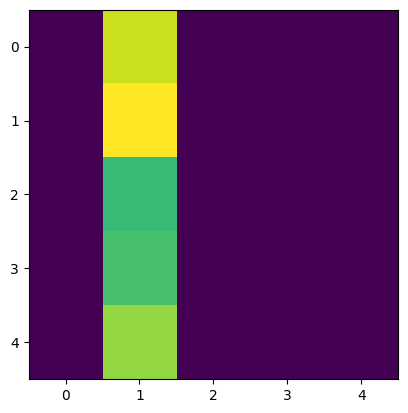

In [35]:
model.save('animalDetector_model.h5')
Y_pred = model.predict(validation_data)
y_pred = np.argmax(Y_pred,axis=1)
mat = confusion_matrix(validation_data.classes,y_pred)
plt.imshow(mat)


In [36]:
img = cv2.imread("CAT.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255
img = img.reshape(1, 224, 224, 3)

result = model.predict(img)

pred = np.argmax(result)
if pred == 0:
    print(" Elephant ")
elif pred == 1:
    print("Dog")
elif pred == 2:
    print("Cat")
elif pred == 3:
    print("Giraffe")
elif pred == 4:
    print("Pandas")

1/1 [==============================] - 0s 158ms/step
Dog
